# IN_SYS SW10, HS2025 - Example
## Simlpe vs Deep Learning Neuronal Networks
### 2025-11-18, Eugen Rodel

In [1]:
!pip install networkx

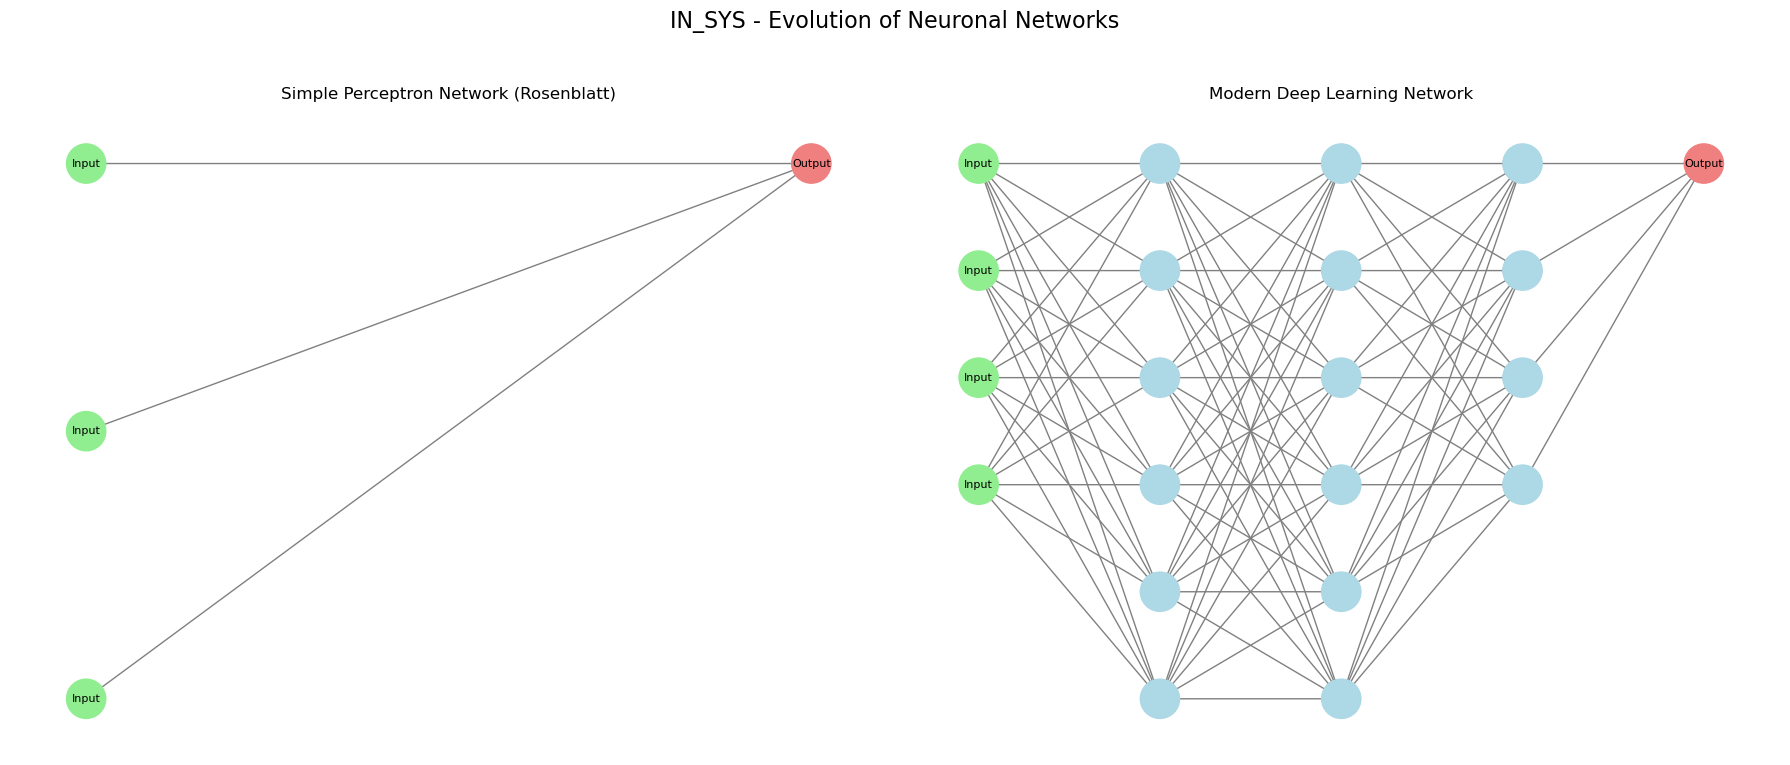

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_perceptron(ax, layers, title):
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    node_labels = {}

    # Create nodes for each layer
    for layer_idx, num_nodes in enumerate(layers):
        for node_idx in range(num_nodes):
            node_name = f'L{layer_idx}N{node_idx}'
            G.add_node(node_name)
            pos[node_name] = (layer_idx, -node_idx)

            # Assign color based on layer type
            if layer_idx == 0:
                node_colors.append('lightgreen')  # Input layer
                node_labels[node_name] = 'Input'
            elif layer_idx == len(layers) - 1:
                node_colors.append('lightcoral')  # Output layer
                node_labels[node_name] = 'Output'
            else:
                node_colors.append('lightblue')  # Hidden layers
                node_labels[node_name] = ''

            # Connect to the previous layer if not the input layer
            if layer_idx > 0:
                for prev_node_idx in range(layers[layer_idx - 1]):
                    prev_node_name = f'L{layer_idx - 1}N{prev_node_idx}'
                    G.add_edge(prev_node_name, node_name)

    nx.draw_networkx_nodes(G, pos, node_size=800, node_color=node_colors, ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color='gray', ax=ax)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color='black', ax=ax)
    ax.set_title(title)
    ax.axis('off')

# Define the layer structures for the two networks
simple_perceptron_layers = [3, 1]  # Input layer with 3 nodes, output layer with 1 node
deep_learning_layers = [4, 6, 6, 4, 1]  # Input layer, 3 hidden layers, output layer

# Plot the networks
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle("IN_SYS - Evolution of Neuronal Networks", fontsize=16)

draw_perceptron(axes[0], simple_perceptron_layers, "Simple Perceptron Network (Rosenblatt)")
draw_perceptron(axes[1], deep_learning_layers, "Modern Deep Learning Network")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
